# Visualising Tabular Data

- [Simple & Quick](#Simple-&-Quick-(pandas))
- [`seaborn`](#seaborn)
- [Full Control (`matplotlib`)](#Full-control-(matplotlib))

In [1]:
%matplotlib inline

import pandas
import seaborn as sns
import matplotlib.pyplot as plt

db = pandas.read_csv("../data/paris_abb.csv.zip")

## Simple & Quick (`pandas`)

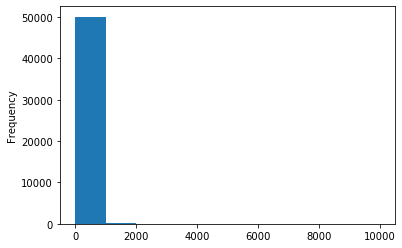

In [2]:
db["Price"].plot.hist()

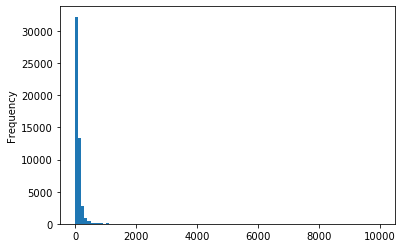

In [3]:
db["Price"].plot.hist(bins=100)

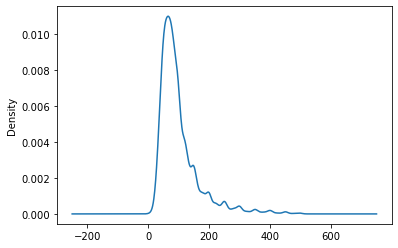

In [4]:
db.query("Price < 500")["Price"].plot.kde()

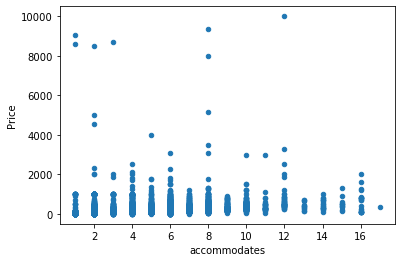

In [5]:
db.plot.scatter("accommodates", "Price")

---

**EXERCISE**

- Create a histogram of the distribution of number of people a property accommodates (`accommodates`)
- Create a scatter plot of the number of beds and number of bedrooms

---

**More**

> [`https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

We can also combine this with groupings from the previous notebook:

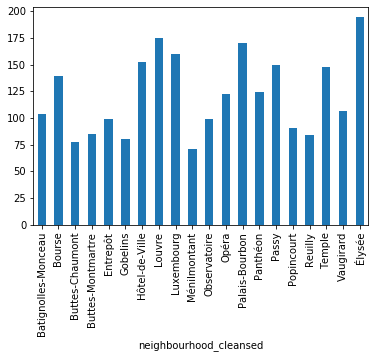

In [13]:
db.groupby("neighbourhood_cleansed")\
  ["Price"]\
  .mean()\
  .plot.bar()

---

**EXERCISE**

Create a bar plot of the average `review_scores_rating` by neighbourhood, sorted by average price. 

For a "pro" touch (optional), substract 90 from the reviews score before plotting.

---

## `seaborn`

- Univariate

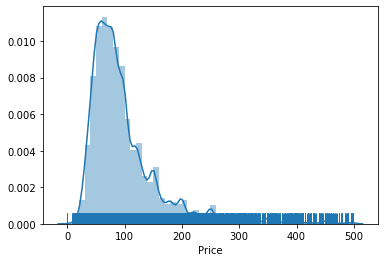

In [6]:
sns.distplot(db.query("Price < 500")["Price"], 
             kde=True, 
             rug=True)

* Bivariate

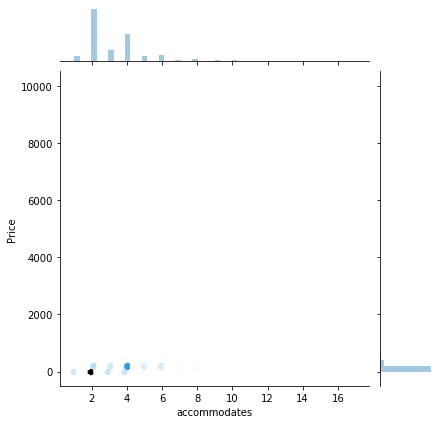

In [7]:
sns.jointplot(x = "accommodates",
              y = "Price",
              data=db,
              kind="hex"
             );

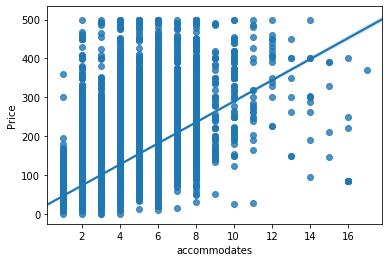

In [8]:
sns.regplot(x = "accommodates",
            y = "Price",
            data=db.query("Price < 500")
           );

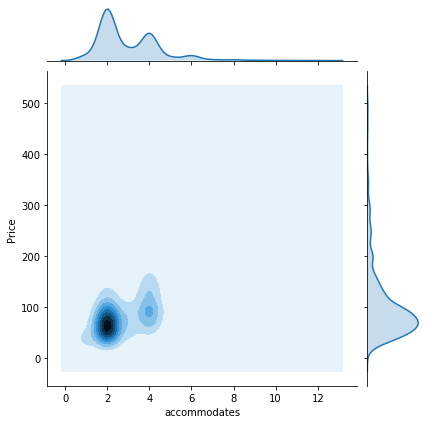

In [9]:
sns.jointplot(x = "accommodates",
              y = "Price",
              data=db.query("Price < 500")\
                     .sample(1000),
              kind="kde"
             );

---

**EXERCISE**

Explore the documentation of `jointplot` and create a figure similar to the one above where you replace the hexagonal binning for a KDE. Since this will probably take too long, subset your data before plotting to only properties cheaper than $500, and then randomly sample 1,000 observations (tip: check out the [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method).

---

**More**

> [`http://seaborn.pydata.org/tutorial.html`](http://seaborn.pydata.org/tutorial.html)

- Categorical

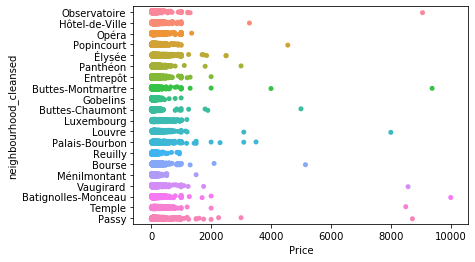

In [10]:
sns.stripplot(x = "Price",
              y = "neighbourhood_cleansed",
              data=db
             );

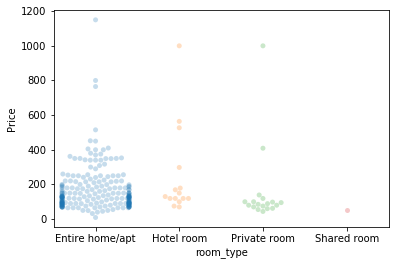

In [11]:
sns.swarmplot(x = "room_type",
              y = "Price",
              data=db.query("neighbourhood_cleansed == 'Louvre'")\
                     .sample(250),
              alpha=0.25
             );

To note:

* With larger datasets, it's hard to see any pattern
* This is true even if you jitter the points around to avoid overlap and/or you play with transparency (`alpha`)
* Algorithms to separate out dots exist but they're computationally intensive and can only do so much

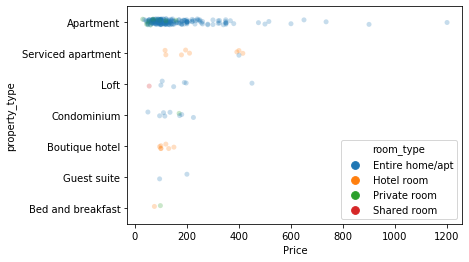

In [12]:
sns.stripplot(x = "Price",
              y = "property_type",
              hue = "room_type",
              data=db.query("neighbourhood_cleansed == 'Louvre'")\
                     .sample(250),
              alpha=0.25
             );

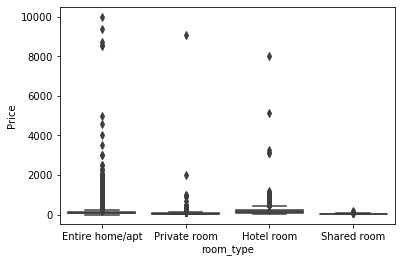

In [13]:
sns.boxplot(x = "room_type",
            y = "Price",
            data = db
           );

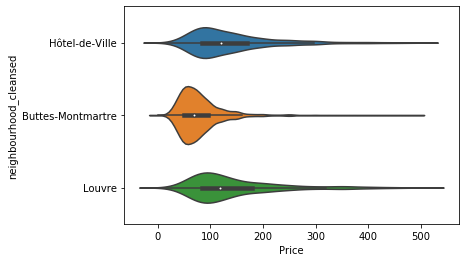

In [14]:
nei_list = ["Hôtel-de-Ville", "Louvre", "Buttes-Montmartre"]
sub = db["neighbourhood_cleansed"].isin(nei_list)

sns.violinplot(x = "Price",
               y = "neighbourhood_cleansed",
               data = db[sub].query("Price < 500")
              );

---

**EXERCISE**

Explore the distribution of price by property type

---

## Full control (`matplotlib`)

#### One

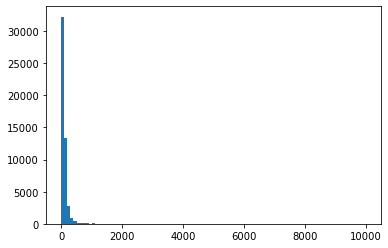

In [15]:
f, ax = plt.subplots(1)

ax.hist(db['Price'], bins=100)

plt.show()

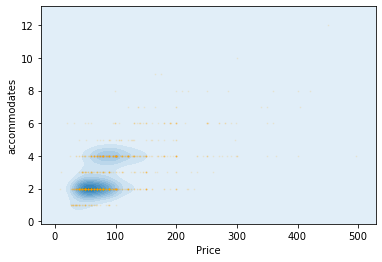

In [16]:
sub = db.query("Price < 500")\
        .sample(1000)

f, ax = plt.subplots(1)

sns.kdeplot(sub['Price'], sub['accommodates'], 
            shade=True, ax=ax)
ax.scatter(sub['Price'], sub['accommodates'],
           alpha=0.1, s=0.75, color='orange')

plt.show()

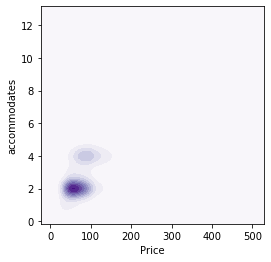

In [17]:
f, ax = plt.subplots(1, figsize=(4, 4))

sns.kdeplot(sub['Price'],
            sub['accommodates'], 
            shade=True, ax=ax, cmap='Purples')

plt.show()

**CHALLENGE** - Create a visualisation that includes a KDE and a scatter plot and that explores the relationship between number of beds and number of people it accommodates, for a random sample of 500 properties.

#### Two or more

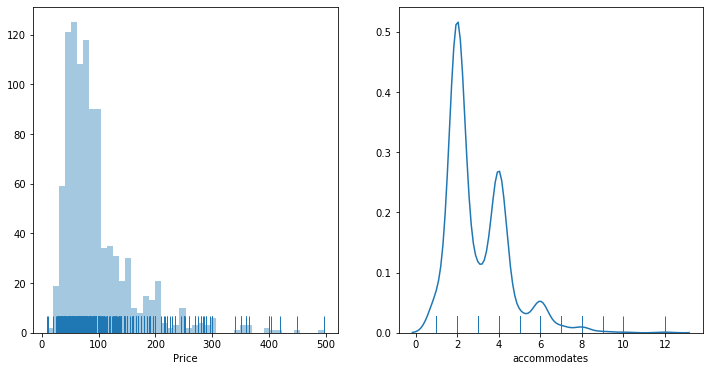

In [18]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(sub['Price'], 
             kde=False, 
             rug=True, 
             ax=axs[0]
            )

sns.distplot(sub['accommodates'], 
             hist=False, 
             kde=True, 
             rug=True, 
             ax=axs[1]
            )

plt.show()

**CHALLENGE** - Create a visualisation for all of the properties with three subplots:

1. Histogram of price
1. Scatter plot of price Vs number of people it accommodates
1. Histogram of number of people the property accommodates